In [85]:
from rfgap import RFGAP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dataset import dataprep
from phate import PHATE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [86]:
# datasets = ['hepatitis', 'lymphography', 'iris', 'audiology', 'parkinsons', 
#                        'wine', 'glass', 'heart_failure', 'ionosphere', 'seeds',
#                        'audiology', 'flare1', 'heart_disease', 'crx', 'balance_scale',
#                        'hill_valley', 'breast_cancer', 'diabetes', 'titanic', 'car', 
#                        'treeData', 'chess', 'tic-tac-toe', 'optdigits', 'waveform', 'mnist_test']


datasets = ['hepatitis', 'lymphography', 'iris', 'audiology', 'parkinsons', 
                       'wine', 'glass', 'heart_failure', 'ionosphere', 'seeds',
                       'audiology', 'flare1', 'heart_disease', 'crx', 'balance_scale',
                       'hill_valley', 'breast_cancer', 'diabetes', 'car', 
                       'chess', 'tic-tac-toe', 'optdigits', 'waveform']


print(len(datasets))

23


In [87]:
df = pd.DataFrame()

for datatset in datasets:
    df_temp = pd.read_csv('trust_tables/' + datatset + '_trust_table.csv')

    df = pd.concat([df, df_temp], axis=0)

In [88]:
df

,Dataset,Quantiles,Trust,Baseline Accuracy,Classifiable Accuracy,Accuracy Diff,Pct. Dropped,Accuracy Drop Ratio
0,hepatitis,0.05,0.385806,0.653226,0.675214,0.021988,0.050725,0.433475
1,hepatitis,0.10,0.447707,0.653226,0.684685,0.031459,0.094203,0.333948
2,hepatitis,0.15,0.488759,0.653226,0.714286,0.061060,0.137681,0.443488
3,hepatitis,0.20,0.517284,0.653226,0.737374,0.084148,0.181159,0.464497
4,hepatitis,0.25,0.544625,0.653226,0.752688,0.099462,0.224638,0.442768
...,...,...,...,...,...,...,...,...
14,waveform,0.75,0.905137,0.843778,0.985778,0.142000,0.675000,0.210370
15,waveform,0.80,0.916696,0.843778,0.986667,0.142889,0.720000,0.198457
16,waveform,0.85,0.928835,0.843778,0.989630,0.145852,0.765000,0.190656
17,waveform,0.90,0.942524,0.843778,0.995556,0.151778,0.810000,0.187380


In [89]:
sns.set_theme()

/tmp/ipykernel_3425206/3825032413.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.lineplot(df, x = 'Quantiles', y = df['Accuracy Diff'] * 100, ci = 95)


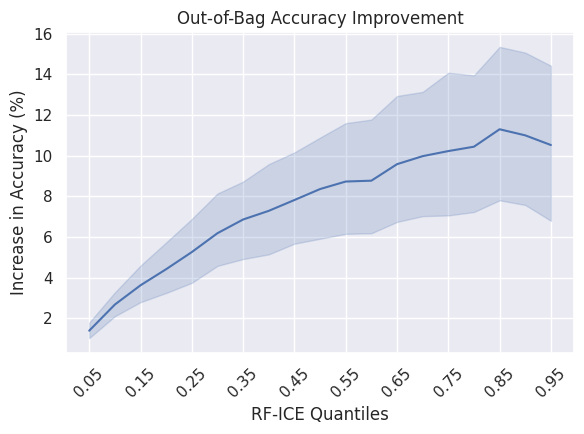

In [90]:
fig = plt.figure(figsize=(6, 4.5))


ax = sns.lineplot(df, x = 'Quantiles', y = df['Accuracy Diff'] * 100, ci = 95)
ax.set_title('Out-of-Bag Accuracy Improvement')
ax.set_ylabel('Increase in Accuracy (%)')
ax.set_xlabel('RF-ICE Quantiles')
ax.set_xticks(df['Quantiles'].unique()[::2])
ax.set_xticklabels(df['Quantiles'].unique()[::2], rotation=45)

plt.tight_layout()
plt.savefig('figures/accuracy_diff.pdf')

/tmp/ipykernel_3425206/595938648.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.lineplot(df, x = 'Quantiles', y = df['Classifiable Accuracy'] * 100, ci = 95)


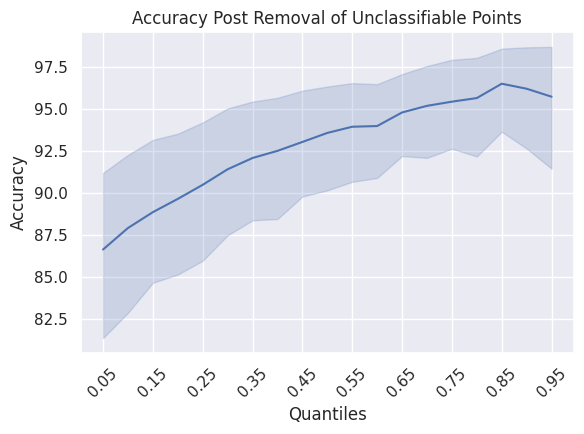

In [91]:
fig = plt.figure(figsize=(6, 4.5))


ax = sns.lineplot(df, x = 'Quantiles', y = df['Classifiable Accuracy'] * 100, ci = 95)
ax.set_title('Accuracy Post Removal of Unclassifiable Points')
ax.set_ylabel('Accuracy')
ax.set_xticks(df['Quantiles'].unique()[::2])
ax.set_xticklabels(df['Quantiles'].unique()[::2], rotation=45)

plt.tight_layout()
plt.savefig('figures/classifiable_accuracy.pdf')

/tmp/ipykernel_3425206/20036675.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax[0] = sns.lineplot(df, x = 'Quantiles', y = df['Classifiable Accuracy'] * 100, ci = 95, ax = ax[0])
/tmp/ipykernel_3425206/20036675.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(df, x = 'Quantiles', y = df['Accuracy Diff'] * 100, ci = 95, ax = ax[1])


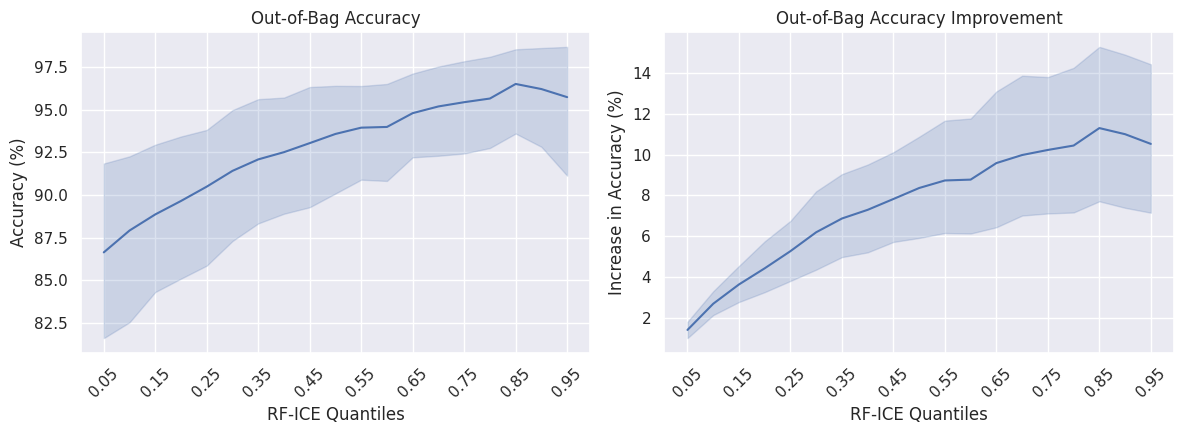

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))

ax[0] = sns.lineplot(df, x = 'Quantiles', y = df['Classifiable Accuracy'] * 100, ci = 95, ax = ax[0])
ax[0].set_title('Out-of-Bag Accuracy')
ax[0].set_ylabel('Accuracy (%)')
ax[0].set_xlabel('RF-ICE Quantiles')
ax[0].set_xticks(df['Quantiles'].unique()[::2])
ax[0].set_xticklabels(df['Quantiles'].unique()[::2], rotation=45)


sns.lineplot(df, x = 'Quantiles', y = df['Accuracy Diff'] * 100, ci = 95, ax = ax[1])
ax[1].set_title('Out-of-Bag Accuracy Improvement')
ax[1].set_ylabel('Increase in Accuracy (%)')
ax[1].set_xlabel('RF-ICE Quantiles')
ax[1].set_xticks(df['Quantiles'].unique()[::2])
ax[1].set_xticklabels(df['Quantiles'].unique()[::2], rotation=45)

plt.tight_layout()
plt.savefig('figures/accuracy_and_increase.pdf')


/tmp/ipykernel_3425206/1738334954.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax[0] = sns.lineplot(df, x = 'Trust', y = df['Classifiable Accuracy'] * 100, ci = 95, ax = ax[0])
/tmp/ipykernel_3425206/1738334954.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(df, x = 'Trust', y = df['Accuracy Diff'] * 100, ci = 95, ax = ax[1])


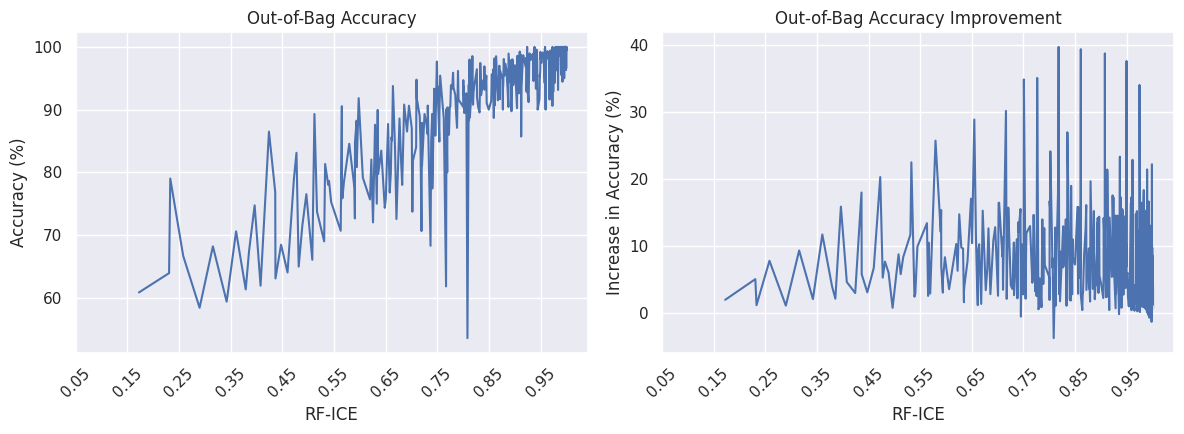

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))

ax[0] = sns.lineplot(df, x = 'Trust', y = df['Classifiable Accuracy'] * 100, ci = 95, ax = ax[0])
ax[0].set_title('Out-of-Bag Accuracy')
ax[0].set_ylabel('Accuracy (%)')
ax[0].set_xlabel('RF-ICE')
ax[0].set_xticks(df['Quantiles'].unique()[::2])
ax[0].set_xticklabels(df['Quantiles'].unique()[::2], rotation=45)


sns.lineplot(df, x = 'Trust', y = df['Accuracy Diff'] * 100, ci = 95, ax = ax[1])
ax[1].set_title('Out-of-Bag Accuracy Improvement')
ax[1].set_ylabel('Increase in Accuracy (%)')
ax[1].set_xlabel('RF-ICE')
ax[1].set_xticks(df['Quantiles'].unique()[::2])
ax[1].set_xticklabels(df['Quantiles'].unique()[::2], rotation=45)

plt.tight_layout()
# plt.savefig('figures/accuracy_and_increase.pdf')


In [93]:
temp_df = df.groupby(['Dataset', 'Quantiles'])[['Classifiable Accuracy', 'Pct. Dropped']].mean().reset_index()


temp_df


,Dataset,Quantiles,Classifiable Accuracy,Pct. Dropped
0,audiology,0.05,0.790123,0.047368
1,audiology,0.10,0.831169,0.089474
2,audiology,0.15,0.848276,0.136842
3,audiology,0.20,0.875912,0.178947
4,audiology,0.25,0.906250,0.226316
...,...,...,...,...
413,wine,0.75,0.975000,0.674157
414,wine,0.80,0.968750,0.719101
415,wine,0.85,0.960000,0.758427
416,wine,0.90,0.960000,0.758427


In [94]:
df.groupby('Dataset')['Baseline Accuracy'].mean()

Dataset
audiology        0.777778
balance_scale    0.834520
breast_cancer    0.968203
car              0.980064
chess            0.990960
crx              0.882747
diabetes         0.756874
flare1           0.879310
glass            0.755208
heart_disease    0.588235
heart_failure    0.851301
hepatitis        0.653226
hill_valley      0.572477
ionosphere       0.926984
iris             0.948148
lymphography     0.827068
optdigits        0.980523
parkinsons       0.914286
seeds            0.949721
tic-tac-toe      0.962877
waveform         0.843778
wine             0.981250
Name: Baseline Accuracy, dtype: float64

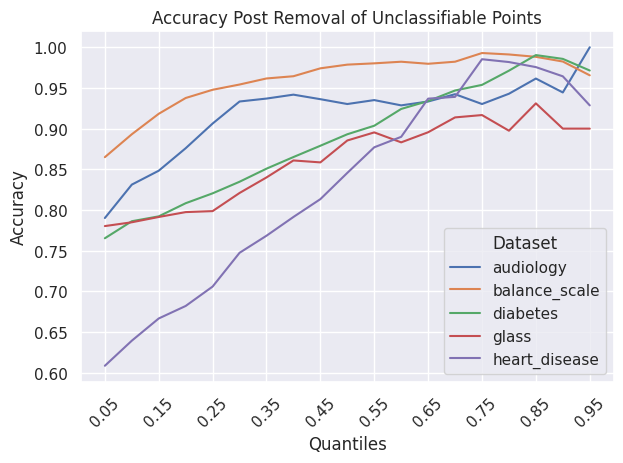

In [95]:
data_subset = ['audiology', 'balance_scale', 'diabetes', 'glass', 'heart_disease']

temp_df = temp_df[temp_df['Dataset'].isin(data_subset)]


ax = sns.lineplot(data = temp_df, x='Quantiles', y='Classifiable Accuracy', hue='Dataset')
ax.set_title('Accuracy Post Removal of Unclassifiable Points')
ax.set_ylabel('Accuracy')
ax.set_xticks(df['Quantiles'].unique()[::2])
ax.set_xticklabels(df['Quantiles'].unique()[::2], rotation=45)

plt.tight_layout()
plt.show()


TypeError: 'NoneType' object is not iterable

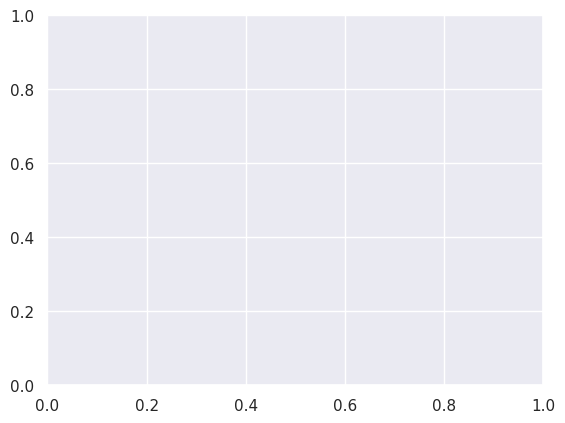

In [96]:
# data_subset = ['audiology', 'balance_scale', 'diabetes', 'glass', 'heart_disease']
data_subset = ['waveform']

temp_df = temp_df[temp_df['Dataset'].isin(data_subset)]


ax = sns.lineplot(data = temp_df, x='Quantiles', y = 'Pct. Dropped', hue='Dataset')
ax.set_title('Accuracy Post Removal of Unclassifiable Points')
ax.set_ylabel('Accuracy')
ax.set_xticks(df['Quantiles'].unique()[::2])
ax.set_xticklabels(df['Quantiles'].unique()[::2], rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
df